In [1]:
import torch
from unet import UNet
import diffusion as df
from visualize import visualize_value_map


In [2]:
def visualize_tensor(x):
    x = x.reshape(4, 100).permute(1, 0).detach().numpy()
    visualize_value_map(x, 10)


In [4]:
from utils import ValueMapData

data = ValueMapData("../data/p1")

x = data[0].float()
t = torch.tensor([0])

net = UNet()
device = torch.device("cpu")
base = df.DiffusionModel(net, device)

base.sliced_score_matching(x[None], t)

tensor(0.0229, grad_fn=<MeanBackward0>)

In [6]:
net = UNet()
device = torch.device("cuda")
net.to(device)
base = df.DiffusionModel(net, device)
base.load_state_dict(torch.load("./models/model1.pt", weights_only=True))



sampler = df.DiffusionSampler(base, 1000, base.betas)

x = sampler.langevin_sampler((1, 4, 10, 10), device).to(torch.device('cpu'))

visualize_tensor(x)

NameError: name 'compute_sample_steps' is not defined

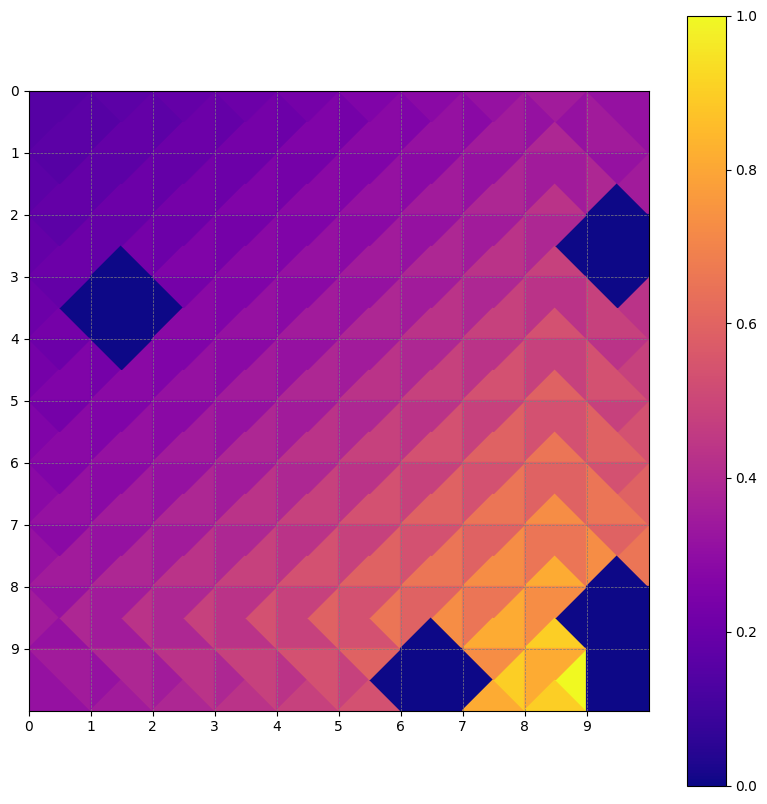

In [13]:
from utils import ValueMapData

data = ValueMapData("./data/p1")

x = data[0]

visualize_tensor(x)

In [14]:
x = data[0].float().to(torch.device('cuda'))
t = torch.tensor([0]).to(torch.device('cuda'))

base.to(torch.device('cuda'))
score = base(x[None], t)
print(torch.sum(score ** 2))

noise = torch.randn(1, 4, 10, 10)
score = base(noise, t)
print(torch.sum(score ** 2))


tensor(0.8866, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8866, device='cuda:0', grad_fn=<SumBackward0>)


In [26]:
from time import sleep
from IPython.display import clear_output

# noise = data[0].float()[None]
nose = torch.randn((1, 4, 10, 10)).to(torch.device('cpu'))
for _ in range(1000):
    score = base(noise, t)
    score = score.to(torch.device('cpu'))
    noise = noise + .1 * score 
visualize_tensor(noise)


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 7.77 GiB of which 28.38 MiB is free. Process 48351 has 1.08 GiB memory in use. Process 50486 has 1.42 GiB memory in use. Including non-PyTorch memory, this process has 4.71 GiB memory in use. Of the allocated memory 4.46 GiB is allocated by PyTorch, and 42.04 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)